In [1]:
import os
import json

In [2]:
kaggle_user="kaynatumar"
kaggle_key="5247b33938da20c697258670411fdfd4"
os.makedirs(os.path.join(os.path.expanduser("~"), ".kaggle"), exist_ok=True)
with open(os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json"), 'w') as file:
    json.dump({"username": kaggle_user, "key": kaggle_key}, file)
os.chmod(os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json"), 0o600)


In [3]:
os.environ["kaggle_user"]="kaynatumar"


In [4]:
os.environ["kaggle_key"]="5247b33938da20c697258670411fdfd4"

In [5]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 95% 128M/134M [00:01<00:00, 115MB/s]
100% 134M/134M [00:01<00:00, 106MB/s]


In [6]:
from zipfile import ZipFile


In [7]:
file_name="/content/multiclass-weather-dataset.zip"
with ZipFile(file_name, 'r')as zip:
  zip.extractall()
  print('done')

done


In [8]:
import warnings
warnings.filterwarnings('ignore')
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)

['shine', 'sunrise', 'rainy', 'alien_test', 'cloudy', 'foggy', 'test.csv']


In [9]:
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [10]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [11]:
train_cloud_dir = os.path.join(train_dir, 'cloudy')
os.mkdir(train_cloud_dir)

In [12]:
train_sunrise_dir = os.path.join(train_dir, 'sunrise')
os.mkdir(train_sunrise_dir)

In [13]:
train_foggy_dir = os.path.join(train_dir, 'foggy')
os.mkdir(train_foggy_dir)

In [14]:
train_rainy_dir = os.path.join(train_dir, 'rainy')
os.mkdir(train_rainy_dir)

In [15]:
train_shine_dir = os.path.join(train_dir, 'shine')
os.mkdir(train_shine_dir)

In [16]:
validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')
os.mkdir(validation_sunrise_dir)

In [17]:
validation_cloudy_dir = os.path.join(validation_dir, 'cloudy')
os.mkdir(validation_cloudy_dir)

In [18]:
validation_foggy_dir = os.path.join(validation_dir, 'foggy')
os.mkdir(validation_foggy_dir)

In [19]:
validation_rainy_dir = os.path.join(validation_dir, 'rainy')
os.mkdir(validation_rainy_dir)

In [20]:
validation_shine_dir = os.path.join(validation_dir, 'shine')
os.mkdir(validation_shine_dir)

In [21]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [22]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [23]:
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

In [24]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_images(directory):
    fig = plt.figure(figsize=(10, 10))
    images = os.listdir(directory)
    num_images = len(images)
    rows = 3
    columns = num_images // rows + 1

    for i, img_name in enumerate(images):
        img_path = os.path.join(directory, img_name)
        img = mpimg.imread(img_path)
        ax = fig.add_subplot(rows, columns, i+1)
        ax.imshow(img)
        ax.axis('off')

    plt.show()

# Example usage to show images from the training directory of cloudy weather
#show_images(TRAINING_CLOUDY_DIR)


In [25]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import numpy as np

image_folder = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
img = {}
for i in image_folder:
    images = len(os.listdir('/content/weather-data/train/' + i + '/'))
    img[i] = images

fig = px.bar(x=list(img.keys()), y=list(img.values()))
fig.update_layout(
    title={
        'text': 'Distribution of different classes in Training Dataset',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Weather Condition',
    yaxis_title='Number of Images'
)

# Adjust x-axis tick positions
fig.update_xaxes(tickvals=np.arange(len(img)) + 0.5, ticktext=list(img.keys()))

fig.show()

In [26]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training cloudy images are: 255
Training foggy images are: 255
Training rainy images are: 255
Training shine images are: 212
Training sunrise images are: 297


In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
img_width=256; img_height=256
batch_size=16

In [29]:
rain_dir = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


In [30]:
Val_dir = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(Val_dir,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


In [31]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [32]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [33]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics =['accuracy'])

In [35]:
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/50
80/80 [==============================] - ETA: 0s - loss: 0.8550 - accuracy: 0.6217

80/80 [==============================] - 25s 313ms/step - loss: 0.8550 - accuracy: 0.6217 - val_loss: 1.0041 - val_accuracy: 0.6283
Epoch 2/50
80/80 [==============================] - ETA: 0s - loss: 0.8131 - accuracy: 0.6374

80/80 [==============================] - 25s 314ms/step - loss: 0.8131 - accuracy: 0.6374 - val_loss: 0.8462 - val_accuracy: 0.7035
Epoch 3/50
80/80 [==============================] - ETA: 0s - loss: 0.7972 - accuracy: 0.6413

80/80 [==============================] - 24s 298ms/step - loss: 0.7972 - accuracy: 0.6413 - val_loss: 0.8165 - val_accuracy: 0.6947
Epoch 4/50
80/80 [==============================] - ETA: 0s - loss: 0.8269 - accuracy: 0.6224

80/80 [==============================] - 24s 300ms/step - loss: 0.8269 - accuracy: 0.6224 - val_loss: 0.9149 - val_accuracy: 0.5619
Epoch 5/50
80/80 [==============================] - ETA: 0s - loss: 0.8232 - accuracy: 0.6138

80/80 [==============================] - 24s 306ms/step - loss: 0.8232 - accuracy: 0.6138 - val_loss: 0.8350 - val_accuracy: 0.6726
Epoch 6/50
80/80 [==============================] - ETA: 0s - loss: 0.7676 - accuracy: 0.6868

80/80 [==============================] - 24s 299ms/step - loss: 0.7676 - accuracy: 0.6868 - val_loss: 0.8074 - val_accuracy: 0.6637
Epoch 7/50
80/80 [==============================] - ETA: 0s - loss: 0.7643 - accuracy: 0.6641

80/80 [==============================] - 24s 301ms/step - loss: 0.7643 - accuracy: 0.6641 - val_loss: 0.9388 - val_accuracy: 0.6770
Epoch 8/50
80/80 [==============================] - ETA: 0s - loss: 0.7708 - accuracy: 0.6868

80/80 [==============================] - 24s 303ms/step - loss: 0.7708 - accuracy: 0.6868 - val_loss: 0.8192 - val_accuracy: 0.7345
Epoch 9/50
80/80 [==============================] - ETA: 0s - loss: 0.7450 - accuracy: 0.6852

80/80 [==============================] - 24s 300ms/step - loss: 0.7450 - accuracy: 0.6852 - val_loss: 0.7988 - val_accuracy: 0.6947
Epoch 10/50
80/80 [==============================] - ETA: 0s - loss: 0.7251 - accuracy: 0.6907

80/80 [==============================] - 24s 305ms/step - loss: 0.7251 - accuracy: 0.6907 - val_loss: 0.7707 - val_accuracy: 0.7168
Epoch 11/50
80/80 [==============================] - ETA: 0s - loss: 0.7063 - accuracy: 0.7096

80/80 [==============================] - 25s 306ms/step - loss: 0.7063 - accuracy: 0.7096 - val_loss: 0.7811 - val_accuracy: 0.7035
Epoch 12/50
80/80 [==============================] - ETA: 0s - loss: 0.7040 - accuracy: 0.7253

80/80 [==============================] - 25s 318ms/step - loss: 0.7040 - accuracy: 0.7253 - val_loss: 0.7778 - val_accuracy: 0.7212
Epoch 13/50
80/80 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.7284

80/80 [==============================] - 24s 304ms/step - loss: 0.6901 - accuracy: 0.7284 - val_loss: 0.7369 - val_accuracy: 0.6903
Epoch 14/50
80/80 [==============================] - ETA: 0s - loss: 0.6746 - accuracy: 0.7331

80/80 [==============================] - 25s 316ms/step - loss: 0.6746 - accuracy: 0.7331 - val_loss: 0.7457 - val_accuracy: 0.7168
Epoch 15/50
80/80 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.7410

80/80 [==============================] - 24s 299ms/step - loss: 0.6883 - accuracy: 0.7410 - val_loss: 0.7933 - val_accuracy: 0.7035
Epoch 16/50
80/80 [==============================] - ETA: 0s - loss: 0.6757 - accuracy: 0.7292

80/80 [==============================] - 25s 311ms/step - loss: 0.6757 - accuracy: 0.7292 - val_loss: 0.7823 - val_accuracy: 0.7522
Epoch 17/50
80/80 [==============================] - ETA: 0s - loss: 0.6642 - accuracy: 0.7253

80/80 [==============================] - 24s 303ms/step - loss: 0.6642 - accuracy: 0.7253 - val_loss: 0.6573 - val_accuracy: 0.7345
Epoch 18/50
80/80 [==============================] - ETA: 0s - loss: 0.6696 - accuracy: 0.7214

80/80 [==============================] - 24s 305ms/step - loss: 0.6696 - accuracy: 0.7214 - val_loss: 0.7580 - val_accuracy: 0.6991
Epoch 19/50
80/80 [==============================] - ETA: 0s - loss: 0.6600 - accuracy: 0.7418

80/80 [==============================] - 24s 305ms/step - loss: 0.6600 - accuracy: 0.7418 - val_loss: 0.6522 - val_accuracy: 0.7566
Epoch 20/50
80/80 [==============================] - ETA: 0s - loss: 0.6135 - accuracy: 0.7692

80/80 [==============================] - 24s 302ms/step - loss: 0.6135 - accuracy: 0.7692 - val_loss: 0.6995 - val_accuracy: 0.7566
Epoch 21/50
80/80 [==============================] - ETA: 0s - loss: 0.5944 - accuracy: 0.7598

80/80 [==============================] - 25s 317ms/step - loss: 0.5944 - accuracy: 0.7598 - val_loss: 0.8907 - val_accuracy: 0.7522
Epoch 22/50
80/80 [==============================] - ETA: 0s - loss: 0.5969 - accuracy: 0.7630

80/80 [==============================] - 24s 305ms/step - loss: 0.5969 - accuracy: 0.7630 - val_loss: 0.7238 - val_accuracy: 0.7743
Epoch 23/50
80/80 [==============================] - ETA: 0s - loss: 0.6069 - accuracy: 0.7590

80/80 [==============================] - 25s 309ms/step - loss: 0.6069 - accuracy: 0.7590 - val_loss: 0.7892 - val_accuracy: 0.7699
Epoch 24/50
80/80 [==============================] - ETA: 0s - loss: 0.6146 - accuracy: 0.7559

80/80 [==============================] - 25s 310ms/step - loss: 0.6146 - accuracy: 0.7559 - val_loss: 0.6590 - val_accuracy: 0.7743
Epoch 25/50
80/80 [==============================] - ETA: 0s - loss: 0.6143 - accuracy: 0.7567

80/80 [==============================] - 24s 305ms/step - loss: 0.6143 - accuracy: 0.7567 - val_loss: 0.7132 - val_accuracy: 0.7345
Epoch 26/50
80/80 [==============================] - ETA: 0s - loss: 0.5471 - accuracy: 0.7747

80/80 [==============================] - 25s 307ms/step - loss: 0.5471 - accuracy: 0.7747 - val_loss: 0.8285 - val_accuracy: 0.7655
Epoch 27/50
80/80 [==============================] - ETA: 0s - loss: 0.5679 - accuracy: 0.7794

80/80 [==============================] - 24s 304ms/step - loss: 0.5679 - accuracy: 0.7794 - val_loss: 0.7078 - val_accuracy: 0.7522
Epoch 28/50
80/80 [==============================] - ETA: 0s - loss: 0.5656 - accuracy: 0.7724

80/80 [==============================] - 24s 302ms/step - loss: 0.5656 - accuracy: 0.7724 - val_loss: 0.7134 - val_accuracy: 0.7699
Epoch 29/50
80/80 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.7724

80/80 [==============================] - 24s 300ms/step - loss: 0.5986 - accuracy: 0.7724 - val_loss: 0.6508 - val_accuracy: 0.7522
Epoch 30/50
80/80 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.7849

80/80 [==============================] - 24s 302ms/step - loss: 0.5729 - accuracy: 0.7849 - val_loss: 0.6079 - val_accuracy: 0.7920
Epoch 31/50
80/80 [==============================] - ETA: 0s - loss: 0.5357 - accuracy: 0.7928

80/80 [==============================] - 25s 314ms/step - loss: 0.5357 - accuracy: 0.7928 - val_loss: 0.7148 - val_accuracy: 0.7788
Epoch 32/50
80/80 [==============================] - ETA: 0s - loss: 0.5117 - accuracy: 0.7943

80/80 [==============================] - 24s 303ms/step - loss: 0.5117 - accuracy: 0.7943 - val_loss: 0.6709 - val_accuracy: 0.7832
Epoch 33/50
80/80 [==============================] - ETA: 0s - loss: 0.5325 - accuracy: 0.8093

80/80 [==============================] - 24s 303ms/step - loss: 0.5325 - accuracy: 0.8093 - val_loss: 0.6241 - val_accuracy: 0.8009
Epoch 34/50
80/80 [==============================] - ETA: 0s - loss: 0.5194 - accuracy: 0.7936

80/80 [==============================] - 24s 305ms/step - loss: 0.5194 - accuracy: 0.7936 - val_loss: 0.5690 - val_accuracy: 0.8053
Epoch 35/50
80/80 [==============================] - ETA: 0s - loss: 0.5162 - accuracy: 0.7904

80/80 [==============================] - 24s 305ms/step - loss: 0.5162 - accuracy: 0.7904 - val_loss: 0.5228 - val_accuracy: 0.8053
Epoch 36/50
80/80 [==============================] - ETA: 0s - loss: 0.4880 - accuracy: 0.8148

80/80 [==============================] - 26s 319ms/step - loss: 0.4880 - accuracy: 0.8148 - val_loss: 0.6737 - val_accuracy: 0.7920
Epoch 37/50
80/80 [==============================] - ETA: 0s - loss: 0.5636 - accuracy: 0.7849

80/80 [==============================] - 24s 302ms/step - loss: 0.5636 - accuracy: 0.7849 - val_loss: 0.8792 - val_accuracy: 0.7478
Epoch 38/50
80/80 [==============================] - ETA: 0s - loss: 0.5197 - accuracy: 0.7967

80/80 [==============================] - 25s 308ms/step - loss: 0.5197 - accuracy: 0.7967 - val_loss: 0.6740 - val_accuracy: 0.8053
Epoch 39/50
80/80 [==============================] - ETA: 0s - loss: 0.4481 - accuracy: 0.8195

80/80 [==============================] - 25s 311ms/step - loss: 0.4481 - accuracy: 0.8195 - val_loss: 0.7692 - val_accuracy: 0.7832
Epoch 40/50
80/80 [==============================] - ETA: 0s - loss: 0.4829 - accuracy: 0.8100

80/80 [==============================] - 24s 301ms/step - loss: 0.4829 - accuracy: 0.8100 - val_loss: 0.5523 - val_accuracy: 0.8186
Epoch 41/50
80/80 [==============================] - ETA: 0s - loss: 0.4524 - accuracy: 0.8344

80/80 [==============================] - 24s 303ms/step - loss: 0.4524 - accuracy: 0.8344 - val_loss: 0.6599 - val_accuracy: 0.7699
Epoch 42/50
80/80 [==============================] - ETA: 0s - loss: 0.4963 - accuracy: 0.8108

80/80 [==============================] - 24s 301ms/step - loss: 0.4963 - accuracy: 0.8108 - val_loss: 0.6609 - val_accuracy: 0.7876
Epoch 43/50
80/80 [==============================] - ETA: 0s - loss: 0.4849 - accuracy: 0.8195

80/80 [==============================] - 25s 307ms/step - loss: 0.4849 - accuracy: 0.8195 - val_loss: 0.6213 - val_accuracy: 0.7832
Epoch 44/50
80/80 [==============================] - ETA: 0s - loss: 0.4505 - accuracy: 0.8336

80/80 [==============================] - 24s 306ms/step - loss: 0.4505 - accuracy: 0.8336 - val_loss: 0.4886 - val_accuracy: 0.8407
Epoch 45/50
80/80 [==============================] - ETA: 0s - loss: 0.4276 - accuracy: 0.8399

80/80 [==============================] - 24s 301ms/step - loss: 0.4276 - accuracy: 0.8399 - val_loss: 0.5769 - val_accuracy: 0.7743
Epoch 46/50
80/80 [==============================] - ETA: 0s - loss: 0.4340 - accuracy: 0.8257

80/80 [==============================] - 24s 302ms/step - loss: 0.4340 - accuracy: 0.8257 - val_loss: 0.7012 - val_accuracy: 0.7478
Epoch 47/50
80/80 [==============================] - ETA: 0s - loss: 0.4732 - accuracy: 0.8250

80/80 [==============================] - 26s 320ms/step - loss: 0.4732 - accuracy: 0.8250 - val_loss: 0.6523 - val_accuracy: 0.7743
Epoch 48/50
80/80 [==============================] - ETA: 0s - loss: 0.4410 - accuracy: 0.8320

80/80 [==============================] - 25s 311ms/step - loss: 0.4410 - accuracy: 0.8320 - val_loss: 0.6558 - val_accuracy: 0.7920
Epoch 49/50
80/80 [==============================] - ETA: 0s - loss: 0.4267 - accuracy: 0.8509

80/80 [==============================] - 24s 299ms/step - loss: 0.4267 - accuracy: 0.8509 - val_loss: 0.5967 - val_accuracy: 0.8230
Epoch 50/50
80/80 [==============================] - ETA: 0s - loss: 0.4145 - accuracy: 0.8399

80/80 [==============================] - 25s 311ms/step - loss: 0.4145 - accuracy: 0.8399 - val_loss: 0.5942 - val_accuracy: 0.7965


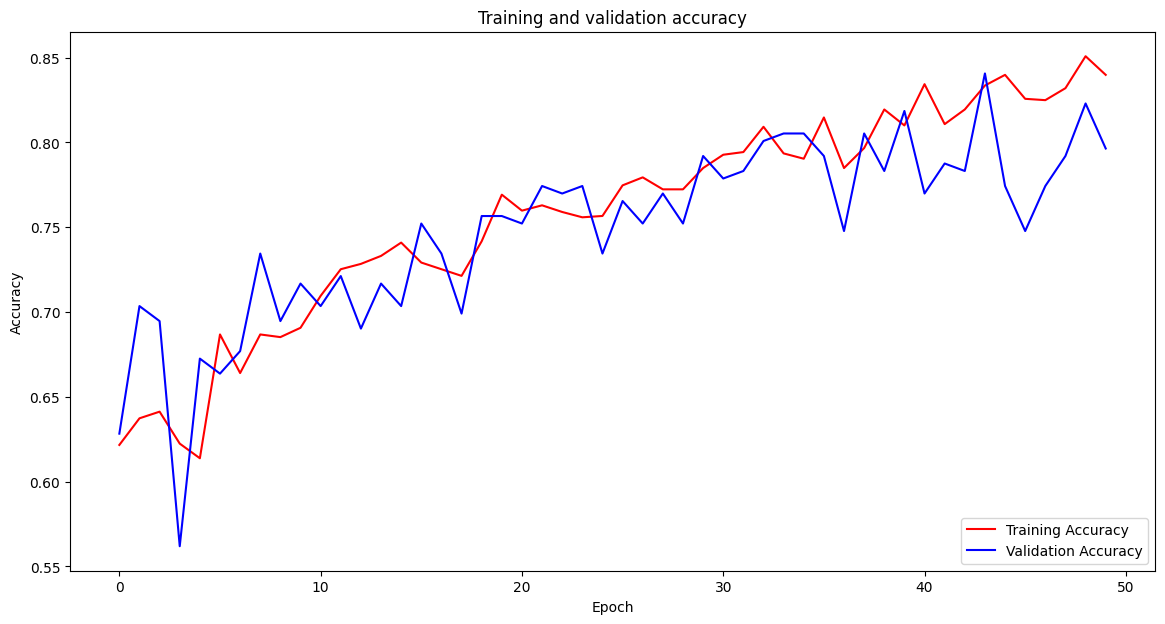

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

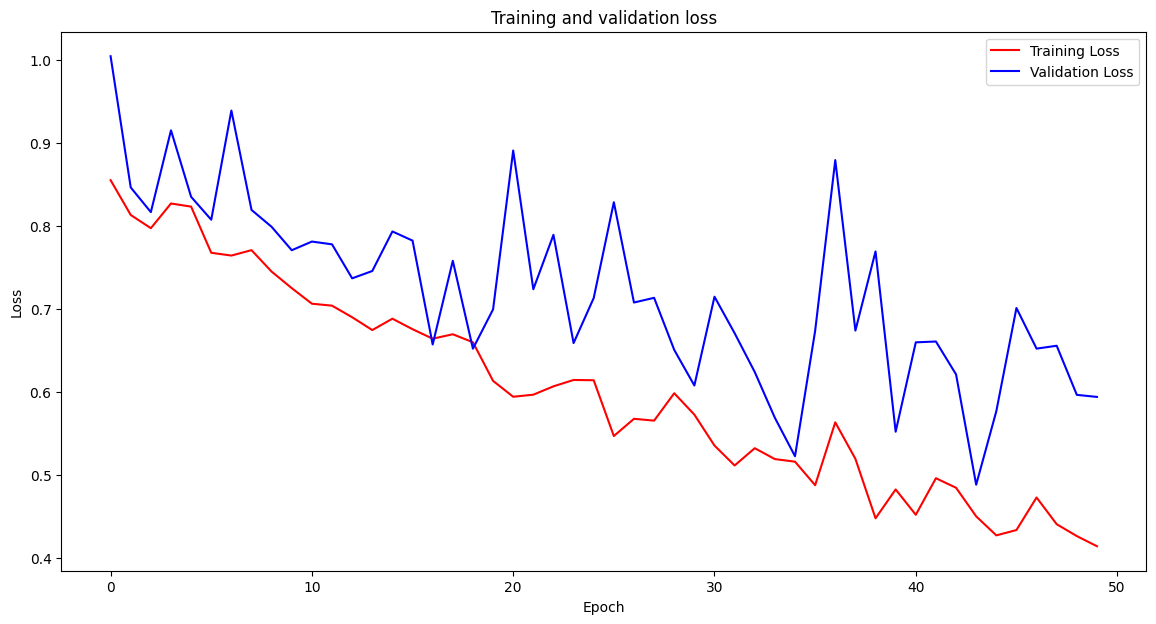

In [37]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [38]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [39]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [40]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 1s 2ms/step
[1 0 3 3 2 2 2 1 0 1 4 3 2 0 2 2 2 2 2 2 3 3 3 4 4 4 2 4 4 4]


In [41]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [42]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [43]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[1, 1, 0, 2, 0],
       [2, 2, 4, 1, 1],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 1, 0, 6]])

In [44]:
train_dir = '/content/weather-data/train/'
classes = os.listdir(train_dir)

In [45]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

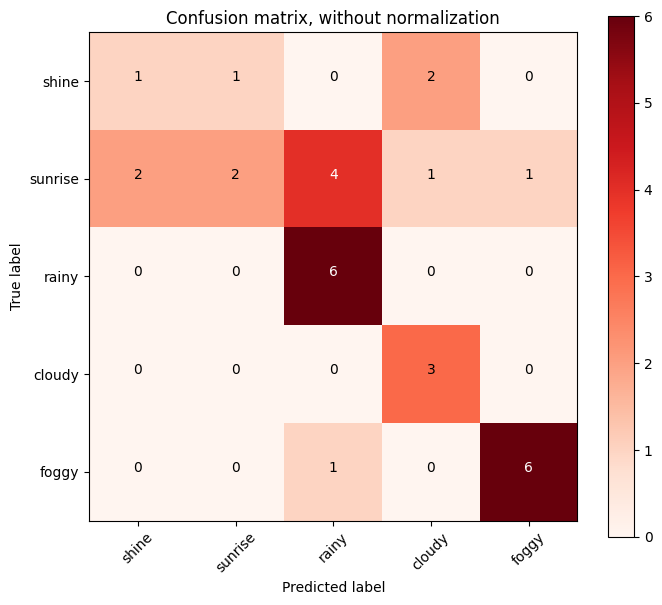

In [46]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()